In [7]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [6]:
torch.manual_seed(321)
#이미지 사이즈 128*128로 고정
IMAGE_SIZE = 128

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.manual_seed_all(321)


In [8]:
original_dataset = ImageFolder(root='data/flower_photos/', 
                               transform=transforms.Compose([
                                   transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                   transforms.ToTensor()
                               ]))

In [10]:
type(original_dataset)

torchvision.datasets.folder.ImageFolder

In [17]:
original_loader = DataLoader(original_dataset, batch_size=100, shuffle=True, num_workers=1)

In [18]:
original_image, labels = next(iter(original_loader))
print(original_image.shape)

torch.Size([100, 3, 128, 128])


In [19]:
labels

tensor([3, 2, 0, 3, 3, 4, 4, 3, 0, 1, 3, 4, 4, 0, 4, 1, 1, 3, 1, 2, 2, 2, 3, 2,
        1, 0, 1, 2, 4, 1, 4, 2, 3, 0, 2, 1, 4, 1, 2, 1, 1, 2, 1, 4, 1, 3, 3, 3,
        4, 1, 0, 0, 3, 3, 1, 4, 4, 3, 4, 0, 2, 3, 0, 0, 2, 2, 2, 3, 1, 2, 3, 2,
        3, 2, 2, 2, 2, 3, 1, 1, 3, 1, 2, 1, 0, 1, 2, 3, 3, 0, 4, 1, 0, 4, 3, 2,
        3, 2, 3, 1])

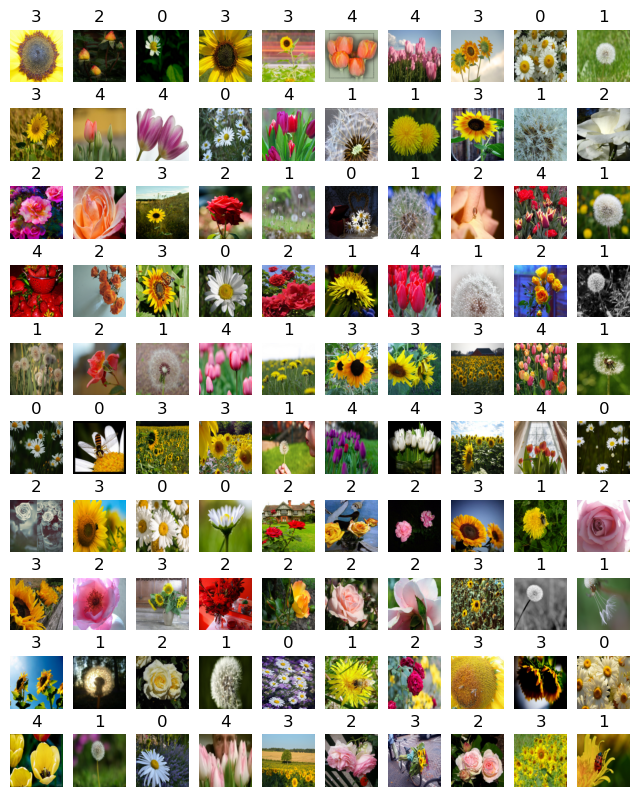

In [21]:
plt.figure(figsize=(8,10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_image[i].permute(1,2,0)) # permute : 인덱스 위치를 바꾸는 함수
    plt.axis('off')
plt.show()

In [2]:
def create_loader(transform):
    transforms_dataset = ImageFolder(root='data/flower_photos', transform=transform)
    transform_loader = DataLoader(transforms_dataset, batch_size=100, num_workers=1, shuffle=True)

    transform_images, labels = next(iter(transform_loader))

    #이미지 3개 가지고 와서 그리기
    fig, axes=plt.subplot(3,2)
    fig.set_size_inches(4,5)

    for idx in range(3):
        axes[idx, 0].imshow(original_image[idx].permute(1,2,))